# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\jmilo\\OneDrive\\Рабочий стол\\Яндекс.Практикум\\Недвижимость\\Проект\\real_estate_data.csv', sep='\t')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


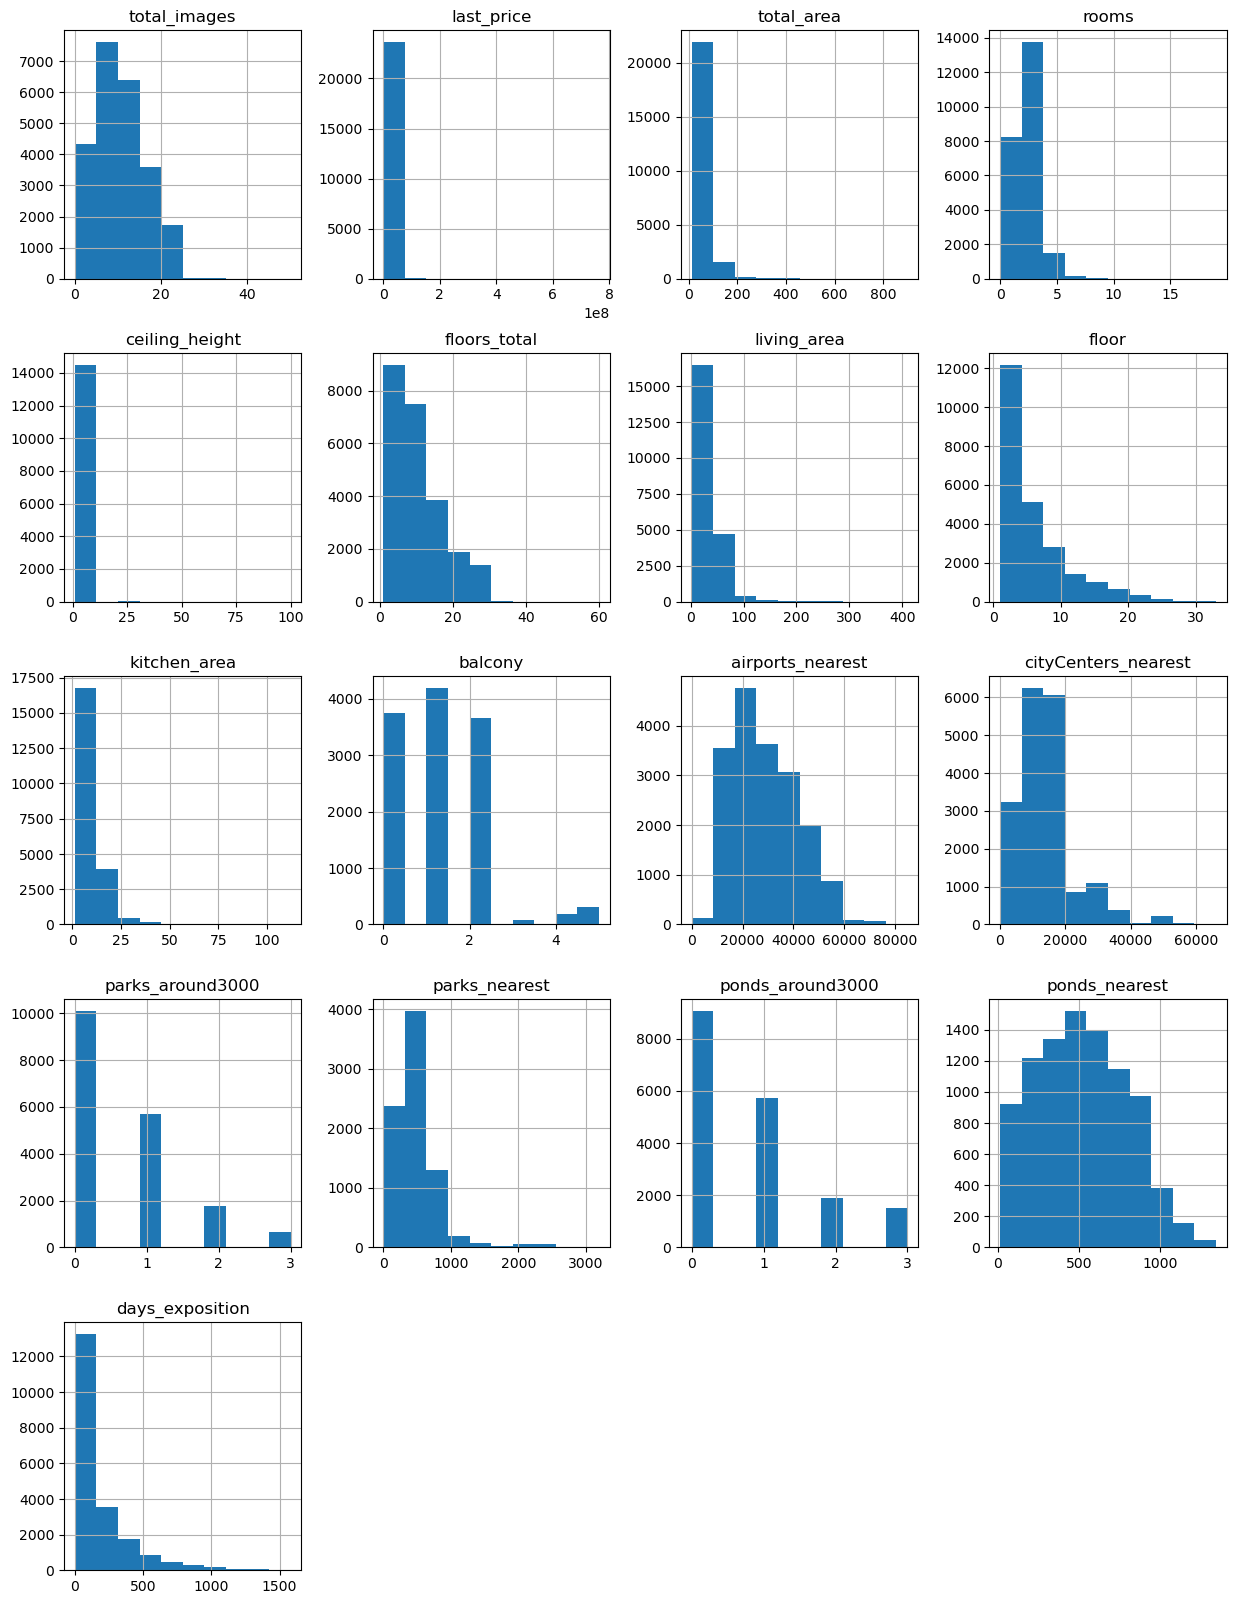

In [3]:
df.hist(figsize=(15, 20));

In [4]:
# посмотрим описание значений датафрейма
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:** общая информация изучена. Датафрейм имеет 22 колонки и 23699 строк. В 14 столбцах имеются пропуски. В некоторых столбцах необходимо изменить тип данных.

### Предобработка данных

In [5]:
# Определяем пропущенные значения
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [6]:
pd.DataFrame(round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
is_apartment,88.300000
parks_nearest,65.900000
ponds_nearest,61.600000
balcony,48.600000
ceiling_height,38.800000
airports_nearest,23.400000
cityCenters_nearest,23.300000
ponds_around3000,23.300000
parks_around3000,23.300000
days_exposition,13.400000


**Заполним пропуски там, где их можно заменить на реальное значение**\
Зачастую заполнение пропусков искуственными данными влечет за собой ошибки, поэтому нам нет смысла их использовать ведь на графиках пропуски будут не видны.\
Реальным значением можно заменить пропуски в столбце 'balcony' - если их количество не указано, можно предположить, что в квартире их нет. Поэтому можно заменить пропущенные значения в этом столбце на 0.

In [7]:
df['balcony'] = df['balcony'].fillna(0)

In [8]:
# Проверим
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Заполнили пропущенные значения реальными данными.

Всего значения пропущены в 13 столбцах датафрейма. Скорее всего в столбцах ceiling_height, living_area, kitchen_area, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest значения пропущены, т.к. люди не знают точные значения и решили их не указывать. В остальных столбцах пропуски могут быть также обусловлены человеческим фактором или условиями публикации объявлений.

**Замена типа данных**

In [9]:
df.head(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Требуется замена типа данных:\
first_day_exposition - to_datetime (формат даты и времени)\
floors_total - int (число этажей может быть только целым)\
is_apartment - bool (да/нет...булевый тип)\
balcony - int (число балконов может быть только целым)\
days_exposition - int (число дней может быть только целым)

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [12]:
# Заменим тип данных в столбце floors_total, т.к. количество этажей может быть только целым числом
df['floors_total'] = df['floors_total'].fillna(0).astype('int')

In [13]:
df['is_apartment'] = df['is_apartment'].astype('bool')

In [14]:
df['balcony'] = df['balcony'].astype('int')

In [15]:
# Пробуем изменить тип данных, если не получится - округлим значения до целого
try:
    df['days_exposition'] = df['days_exposition'].astype('int')
except:
    df['days_exposition'] = df['days_exposition'].round()

In [16]:
# Проверим
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Устранение дубликатов**

In [17]:
# Проверим явные дубликаты
print(df.duplicated().sum())

0


Явных дубликатов нет

**Обработаем неявные дубликаты в названиях населенных пунктов**

In [18]:
print(df['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [19]:
# Приведем слова "посёлок" и "поселок" к одному написанию
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [20]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')

In [21]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок Мга', 'поселок городского типа Мга')

In [22]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок Назия', 'поселок городского типа Назия')

In [23]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок Павлово', 'поселок городского типа Павлово')

In [24]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок Рощино', 'поселок городского типа Рощино')

In [25]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок Советский', 'поселок городского типа Советский')

In [26]:
df['locality_name'] = df['locality_name'].str.replace('поселок Рябово', 'поселок городского типа Рябово')

Неявные дубликаты в названиях населенных пунктов устранены

**Обработка редких и аномальных значений в столбцах**

Выявим аномальные значения в столбцах. Там, где возможно откорректируем их, а в некоторых столбцах удалим все, что выше 99 процентиля, чтобы исключить пики (выбросы значений), но так, чтобы было удалено не более 3-5% данных.

In [27]:
# Посмотрим информацию по всем столбцам датафрейма
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.635090,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.616396,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**last_price**\
Попробуем откорректировать аномально низкое значение в столбце last_price - минимальная цена 12190 руб (невозможно)

In [28]:
# Выделим строки с ценой ниже 500 тыс
df.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.0,1,True,...,5.8,0,городской поселок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
6859,6,490000.0,40.0,2017-12-11,1,NaN,5,NaN,3,True,...,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
9581,7,450000.0,43.4,2018-08-31,2,NaN,5,30.3,3,True,...,5.5,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000.0,29.1,2016-05-05,1,2.50,5,17.0,5,True,...,5.5,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
14911,5,430000.0,54.0,2018-06-26,2,NaN,3,NaN,3,True,...,NaN,0,поселок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16032,8,480000.0,32.0,2019-01-06,1,NaN,2,16.0,1,True,...,NaN,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,NaN,1,True,...,NaN,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16274,18,440000.0,40.0,2018-07-10,1,NaN,5,NaN,1,True,...,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17456,7,430000.0,30.4,2019-04-22,1,NaN,2,16.0,1,True,...,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как видим, такое аномально низкое значение цены одно. Скорее всего двухкомнатная квартира площадью 109 кв. м вблизи парка стоит 12,19 млн рублей. Исправим это.

In [29]:
# Заменим значение в столбце last_price на корректное
df['last_price'] = df['last_price'].replace(12190, 12190000)

In [30]:
# Проверим
df.query('last_price < 500000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.0,1,True,...,5.8,0,городской поселок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
6859,6,490000.0,40.0,2017-12-11,1,NaN,5,NaN,3,True,...,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0
9581,7,450000.0,43.4,2018-08-31,2,NaN,5,30.3,3,True,...,5.5,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
10782,3,490000.0,29.1,2016-05-05,1,2.50,5,17.0,5,True,...,5.5,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0
14911,5,430000.0,54.0,2018-06-26,2,NaN,3,NaN,3,True,...,NaN,0,поселок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16032,8,480000.0,32.0,2019-01-06,1,NaN,2,16.0,1,True,...,NaN,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0
16219,14,450000.0,38.5,2018-07-11,2,2.65,2,NaN,1,True,...,NaN,0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16274,18,440000.0,40.0,2018-07-10,1,NaN,5,NaN,1,True,...,NaN,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17456,7,430000.0,30.4,2019-04-22,1,NaN,2,16.0,1,True,...,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17676,0,450000.0,36.5,2018-02-01,1,NaN,5,17.3,4,True,...,8.5,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


In [31]:
# Рассчитываем 99 процентиль
df['last_price'].quantile(0.99)

36000000.0

In [32]:
# Удалим значения выше 99 процентиля
df = df[df['last_price'] < 36000000]

In [33]:
# Проверим
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23459.000000,2.345900e+04,23459.000000,23459.000000,14347.000000,23459.000000,21585.000000,23459.000000,21209.000000,23459.000000,17928.000000,17948.000000,17949.000000,7904.000000,17949.000000,8919.000000,20336.000000
mean,9.824332,5.832857e+06,58.670359,2.048041,2.764551,10.666482,33.591190,5.898504,10.370440,0.591671,28820.402164,14308.960720,0.599866,493.044787,0.757201,521.273461,179.751967
std,5.663968,4.328443e+06,29.406354,1.044350,1.264772,6.633418,19.078277,4.899229,5.248675,0.959305,12698.156179,8592.287299,0.791018,342.213517,0.928341,277.868091,218.863312
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.505000,5.000000,18.600000,2.000000,7.000000,0.000000,18500.000000,9487.000000,0.000000,289.000000,0.000000,299.000000,45.000000
50%,9.000000,4.600000e+06,51.800000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26766.000000,13170.500000,0.000000,456.000000,0.000000,505.000000,95.000000
75%,14.000000,6.700000e+06,68.890000,3.000000,2.800000,16.000000,42.000000,8.000000,12.000000,1.000000,37407.000000,16360.250000,1.000000,613.000000,1.000000,733.000000,229.000000
max,50.000000,3.595350e+07,470.300000,19.000000,100.000000,60.000000,279.600000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Исправили неккоректное значение в столбце last_price и исключили пики

**Ceiling_height**

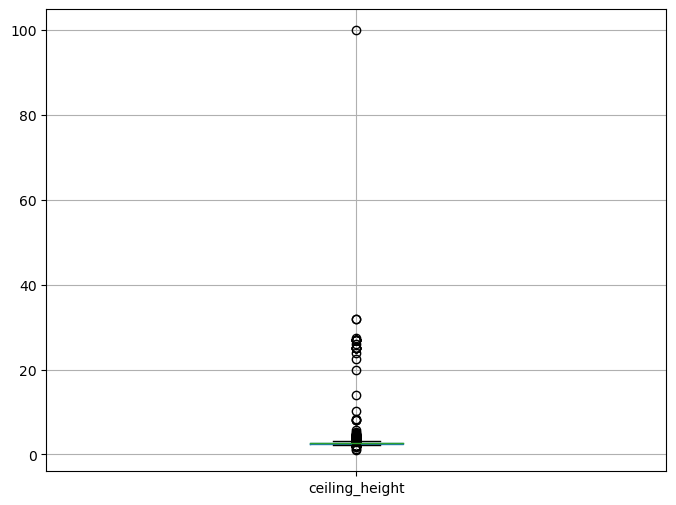

In [34]:
# Посмотрим диаграмму размаха в столбце ceiling_height
import matplotlib.pyplot as plt

df.boxplot(column='ceiling_height', figsize=(8, 6))
plt.show()

Необходимо разделить значения больше 10м на 10, т.к. такая высота потолков не возможна. Такие значения аномальные.

In [35]:
df.loc[df['ceiling_height'] >= 10, 'ceiling_height'] = df['ceiling_height'] / 10

In [36]:
# Проверим
df['ceiling_height'].describe()

count    14347.000000
mean         2.720677
std          0.286793
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

Откорректировали значения в столбце ceiling_height

**living_area**

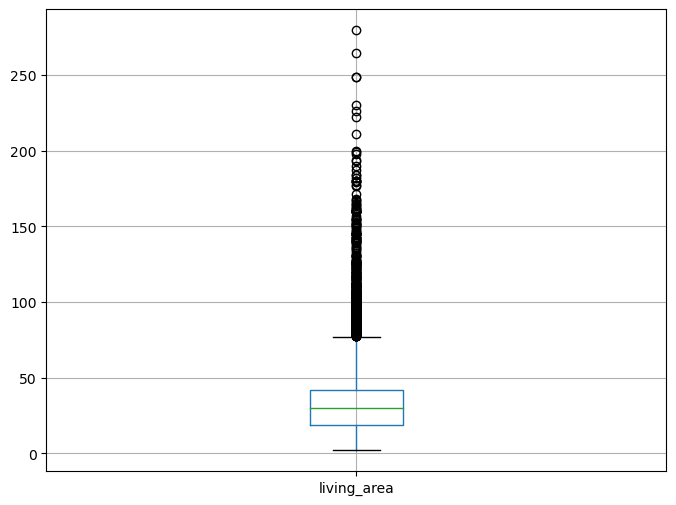

In [37]:
# Посмотрим диаграмму размаха для столбца living_area

df.boxplot(column='living_area', figsize=(8, 6))
plt.show()

In [38]:
# Чтобы понять сколько аномально низких значений посмотрим на жилую площадь менее 10 кв. м
df.query('living_area < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.40,2019-02-07,1,2.90,8,8.3,7,True,...,6.3,0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
680,14,7200000.0,43.00,2017-10-31,1,NaN,8,9.0,2,True,...,23.0,0,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.00,2017-01-29,2,2.70,25,9.0,15,True,...,32.0,2,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
2309,10,4200000.0,62.40,2017-06-15,2,2.60,9,8.4,6,True,...,41.0,2,поселок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.00,2017-07-02,1,NaN,17,3.0,17,True,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
4100,17,5300000.0,34.80,2017-06-19,1,2.70,23,9.0,15,True,...,17.1,0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5,9.0,2,True,...,NaN,0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
7312,8,3400000.0,27.00,2018-02-21,2,2.50,15,9.0,4,True,...,16.0,0,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN
8325,9,4800000.0,52.00,2017-10-25,2,NaN,5,9.0,2,True,...,6.0,1,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0
13915,20,6350000.0,52.00,2018-02-06,2,3.00,6,2.0,2,True,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0


In [39]:
df.query('living_area < 5 & total_area <= 139')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,True,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,True,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24,2.0,22,True,...,NaN,0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0


Выявили 3 аномально низких значения (2 и 3). Вероятнее всего эти значения должны быть домножены на 10, т.к. в квартирах с такой общей площадью и без балконов значения жилой площади будут примерно в 10 раз больше.

In [40]:
# Исправим их по условию
df.loc[(df['living_area'] < 5) & (df['total_area'] <= 139), 'living_area'] = df['living_area'] * 10

In [41]:
# Проверим
df.query('living_area < 5 & total_area <= 139')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**rooms**

In [42]:
# Рассчитываем 99 процентиль
df['rooms'].quantile(0.99)

5.0

In [43]:
# Удалим значения выше 99 процентиля
df = df[df['rooms'] < 5]

In [44]:
# Проверим
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23029.000000,2.302900e+04,23029.000000,23029.000000,14042.000000,23029.000000,21191.000000,23029.000000,20828.000000,23029.000000,17527.000000,17547.000000,17548.000000,7642.000000,17548.000000,8671.000000,20023.000000
mean,9.820096,5.638130e+06,56.702821,1.980720,2.711486,10.741413,32.229128,5.931434,10.246094,0.596335,28899.372283,14469.008378,0.589811,495.560979,0.749601,522.450467,177.972681
std,5.649817,3.984282e+06,24.486953,0.909617,0.277628,6.644948,15.545170,4.914223,5.096941,0.960338,12775.045399,8549.211806,0.783494,344.333698,0.923029,277.528325,216.794358
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.500000,2.000000,7.000000,0.000000,18434.000000,9766.500000,0.000000,290.000000,0.000000,303.000000,44.000000
50%,9.000000,4.550000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26991.000000,13255.000000,0.000000,458.000000,0.000000,506.000000,94.000000
75%,14.000000,6.500000e+06,67.300000,3.000000,2.800000,16.000000,41.300000,8.000000,11.700000,1.000000,37434.000000,16450.500000,1.000000,617.000000,1.000000,733.000000,227.000000
max,50.000000,3.590000e+07,470.300000,4.000000,10.000000,60.000000,248.700000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Недвижимость с количеством комнат 0 может являться квартирой-студией, поэтому мы не будем удалять такие строки.

**balcony**

In [45]:
# Рассчитываем 99 процентиль
df['balcony'].quantile(0.99)

5.0

In [46]:
# Удалим значения выше 99 процентиля
df = df[df['balcony'] < 5]

In [47]:
# Проверим
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22732.000000,2.273200e+04,22732.000000,22732.000000,13817.000000,22732.000000,20913.000000,22732.000000,20537.000000,22732.000000,17289.000000,17309.000000,17310.000000,7543.000000,17310.000000,8568.000000,19785.000000
mean,9.803361,5.605460e+06,56.438058,1.972242,2.711019,10.703986,32.084249,5.904892,10.212750,0.538800,28866.961825,14458.243977,0.591219,495.137213,0.751184,522.077381,178.077028
std,5.639380,3.961462e+06,24.373809,0.908499,0.272037,6.640551,15.523666,4.897841,5.076369,0.823171,12773.361653,8569.675477,0.785266,344.323386,0.923604,277.225105,217.042776
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,39.700000,1.000000,2.500000,5.000000,18.400000,2.000000,7.000000,0.000000,18428.000000,9726.000000,0.000000,289.000000,0.000000,302.750000,44.000000
50%,9.000000,4.540000e+06,50.795000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26933.000000,13252.000000,0.000000,457.000000,0.000000,505.000000,94.000000
75%,14.000000,6.500000e+06,67.000000,3.000000,2.800000,16.000000,41.000000,8.000000,11.600000,1.000000,37412.000000,16453.000000,1.000000,616.000000,1.000000,733.000000,227.000000
max,50.000000,3.590000e+07,470.300000,4.000000,8.300000,60.000000,248.700000,33.000000,100.700000,4.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:** Устранены редкие и аномальные значения в столбцах. Удалено 4% некорректных данных.

**Добавление новых столбцов в таблицу**

In [48]:
# Добавим столбец с ценой за 1 кв м
df['price_kv_m'] = round((df['last_price'] / df['total_area']), 2)

In [49]:
# Добавим столбец с днем публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday

In [50]:
# Добавим столбец с месяцем публикации объявления
df['month'] = df['first_day_exposition'].dt.month

In [51]:
# Добавим столбец с годом публикации объявления
df['year'] = df['first_day_exposition'].dt.year

In [52]:
# Добавим категории этажей недвижимости

def floor_type(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    return 'другой'
# Добавляем новый столбец с категорией этажа
df['floor_type'] = df.apply(floor_type, axis=1)

In [53]:
# Добавим столбец с расстоянием до центра города в км
df['city_center_km'] = round((df['cityCenters_nearest'] / 1000), 1)

In [54]:
# Проверяем
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_kv_m,weekday,month,year,floor_type,city_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.6
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.9
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.1
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.1
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,True,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,11.6
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,True,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,13.9


**Вывод:** новые столбцы добавлены

**Изучим следующие параметры:**
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления;\
  \
  Построим гистограммы для каждого параметра.

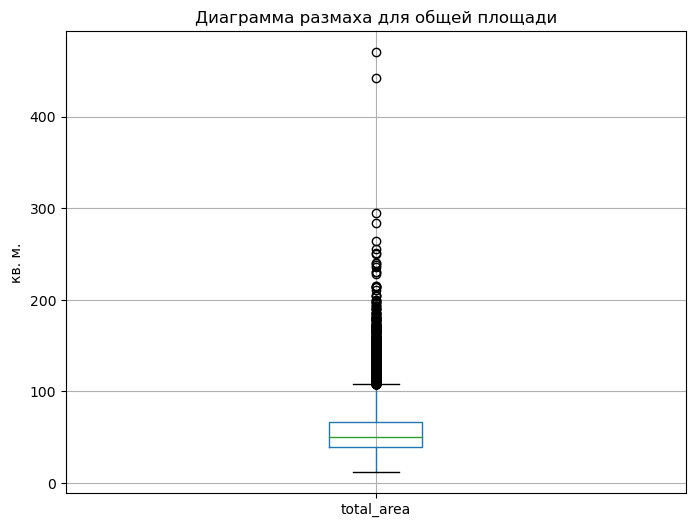

In [55]:
# Общая площадь
df.boxplot(column='total_area', figsize=(8, 6))
plt.title('Диаграмма размаха для общей площади')
plt.ylabel('кв. м.')
plt.show()

Медианное значение примерно 50 кв. м.

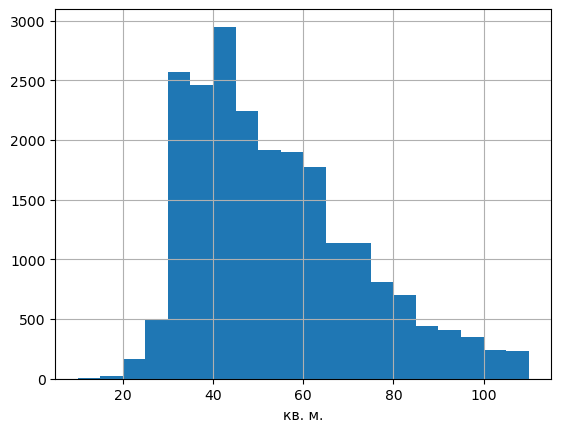

In [56]:
# Построим гистограмму общей площади, отбросив "усы"
df['total_area'].hist(bins=20, range=(10, 110))
plt.xlabel('кв. м.');

Большинство объектов недвижимости имеют общую площадь в интервале от 30 до 50 кв. м.

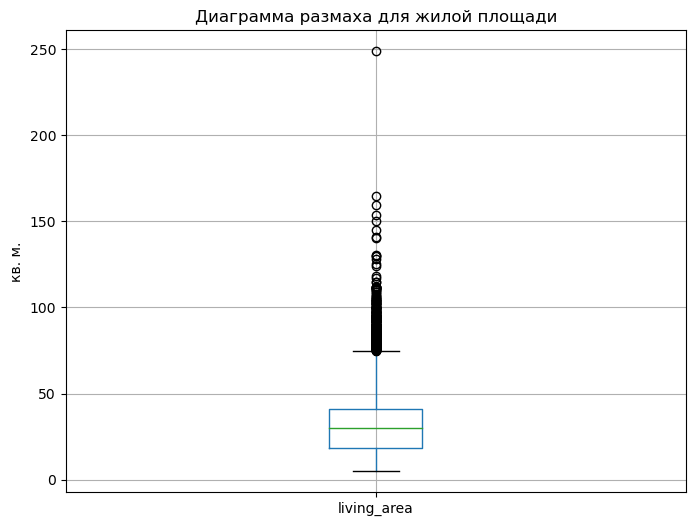

In [57]:
# Жилая площадь
df.boxplot(column='living_area', figsize=(8, 6))
plt.title('Диаграмма размаха для жилой площади')
plt.ylabel('кв. м.')
plt.show()

Медианное значение примерно 28 кв. м.

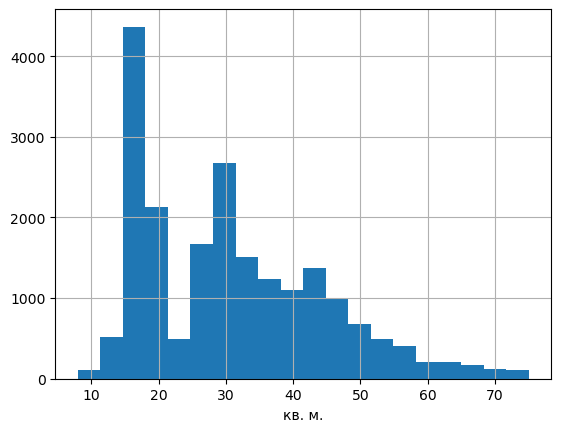

In [58]:
# Построим гистограмму жилой площади, отбросив "усы"
df['living_area'].hist(bins=20, range=(8, 75))
plt.xlabel('кв. м.');

Большинство объектов недвижимости имеют жилую площадь в интервале от 15 до 18 кв. м.

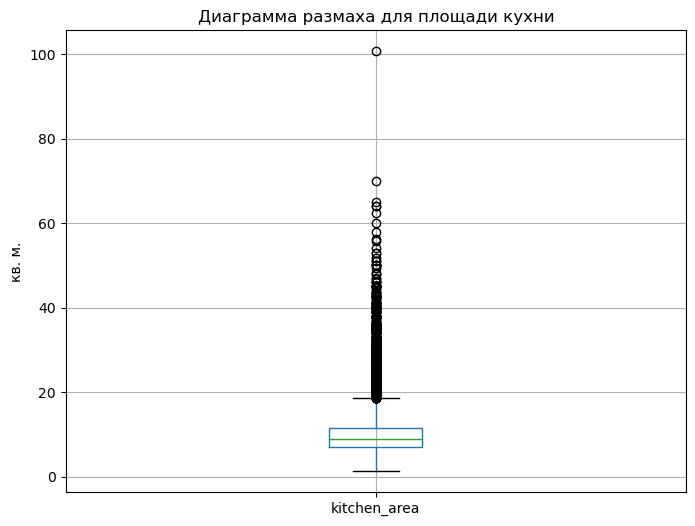

In [59]:
# Площадь кухни
df.boxplot(column='kitchen_area', figsize=(8, 6))
plt.title('Диаграмма размаха для площади кухни')
plt.ylabel('кв. м.')
plt.show()

Медианное значение примерно 10 кв. м.

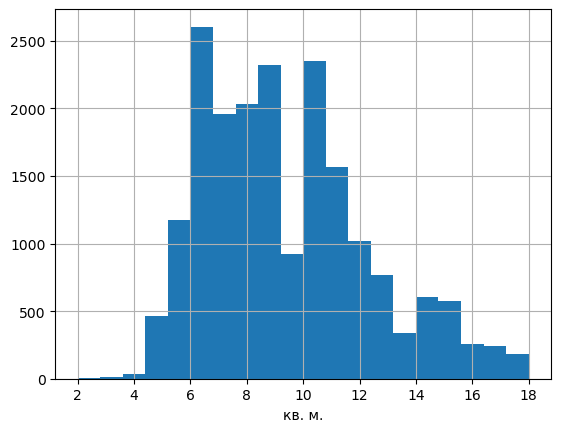

In [60]:
# Построим гистограмму площади кухни, отбросив "усы"
df['kitchen_area'].hist(bins=20, range=(2, 18))
plt.xlabel('кв. м.');

Большинство объектов недвижимости имеют площадь кухни в интервале от 6 до 11 кв. м.

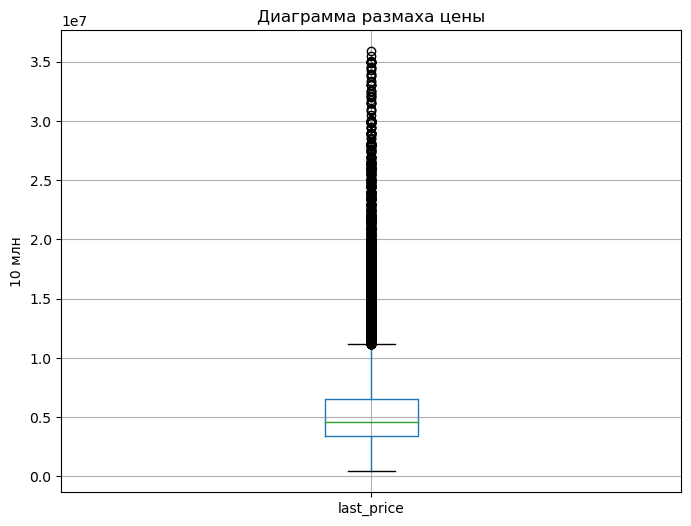

In [61]:
# Цена объекта
df.boxplot(column='last_price', figsize=(8, 6))
plt.title('Диаграмма размаха цены')
plt.ylabel('10 млн')
plt.show()

Медианное значение цены находится чуть ниже 5 млн

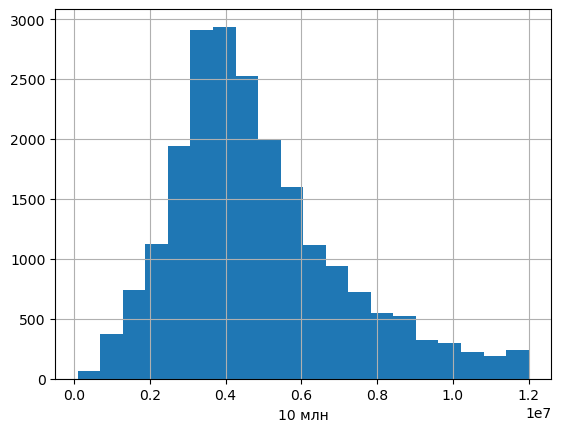

In [62]:
# Построим гистограмму стоимости недвижимости, отбросив "усы"
df['last_price'].hist(bins=20, range=(100000, 12000000))
plt.xlabel('10 млн');

Большинство объектов недвижимости имеют цену в интервале от 3 до 6 млн

In [63]:
df['rooms'].describe()

count    22732.000000
mean         1.972242
std          0.908499
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

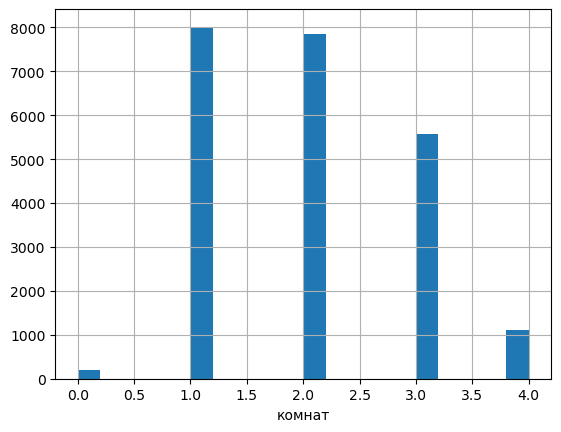

In [64]:
# Построим гистограмму количества комнат
df['rooms'].hist(bins=20, range=(0, 4))
plt.xlabel('комнат');

Большинство объектов недвижимости имеют 1 или 2 комнаты

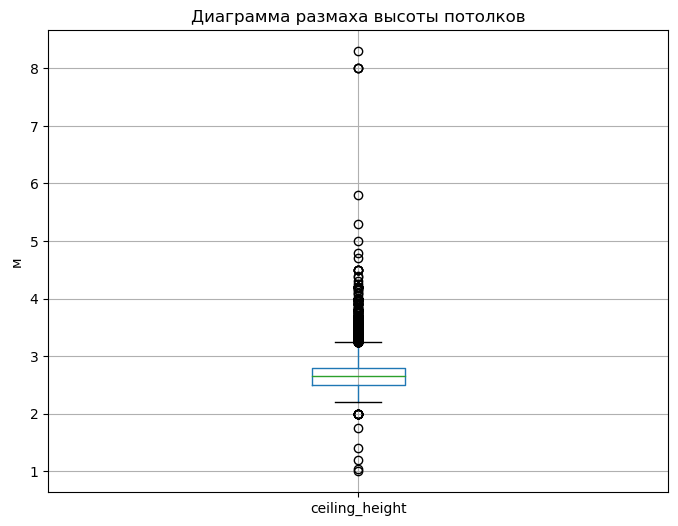

In [65]:
# Высота потолков
df.boxplot(column='ceiling_height', figsize=(8, 6))
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('м')
plt.show()

Медиана высоты потолков находится на уровне 2,7 м

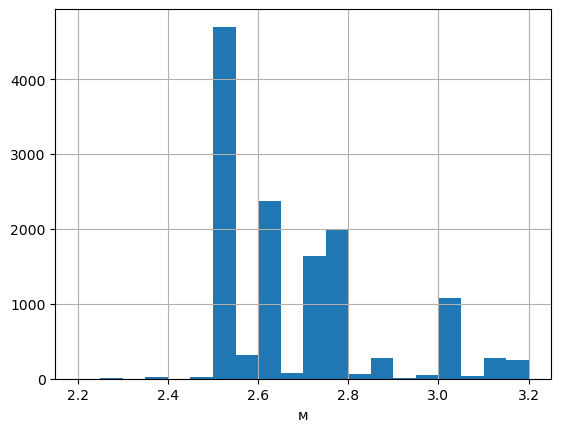

In [66]:
# Построим гистограмму высоты потолков, отбросив "усы"
df['ceiling_height'].hist(bins=20, range=(2.2, 3.2))
plt.xlabel('м');

Большинство объектов недвижимости имеют высоту потолков около 2,5 м

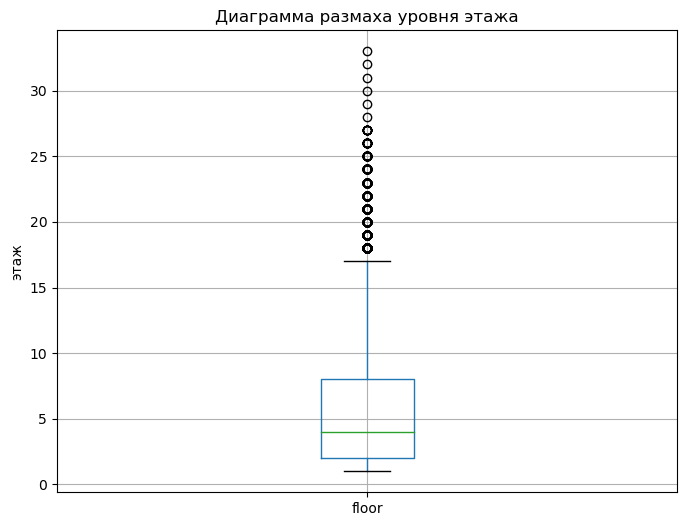

In [67]:
# Этаж
df.boxplot(column='floor', figsize=(8, 6))
plt.title('Диаграмма размаха уровня этажа')
plt.ylabel('этаж')
plt.show()

Большинство объектов недвижимости расположены от 1 до 17 этажа. Медиана - 4 этаж.

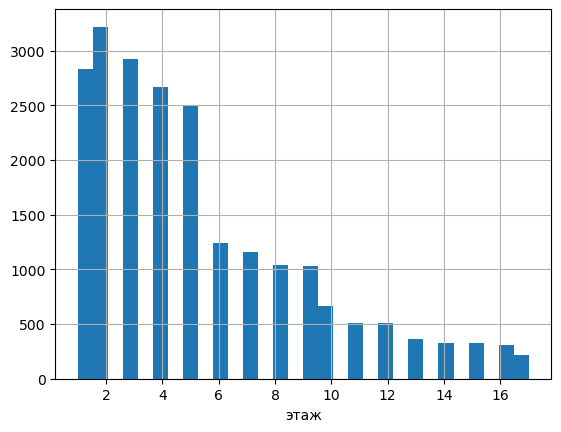

In [68]:
# Построим гистограмму уровня этажа объекта недвижимости, отбросив "усы"
df['floor'].hist(bins=30, range=(1, 17))
plt.xlabel('этаж');

Большинство объектов недвижимости расположены на 1-5 этажах

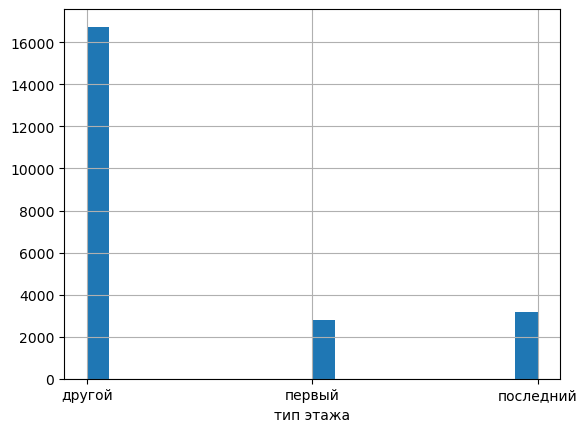

In [69]:
# Тип этажа
df['floor_type'].hist(bins=20)
plt.xlabel('тип этажа');

Из гистограммы видно, что в большинстве объекты недвижимости расположены не на первом и не на последним этажах. Количество квартир на первом и последнем этажах примерно одинаковое.

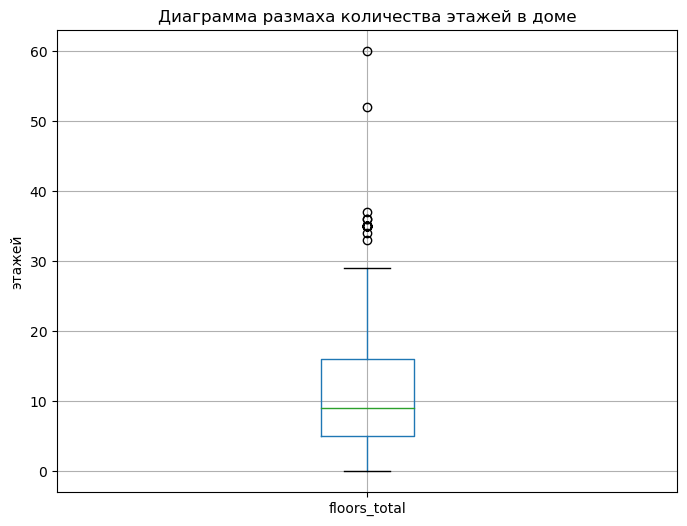

In [70]:
# Количество этажей в доме
df.boxplot(column='floors_total', figsize=(8, 6))
plt.title('Диаграмма размаха количества этажей в доме')
plt.ylabel('этажей')
plt.show()

Медиана - 9 этажные дома

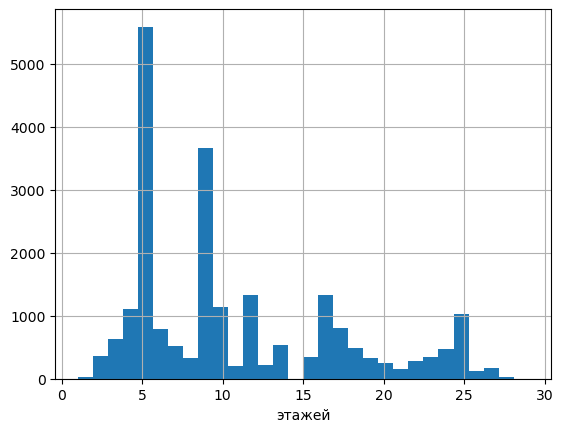

In [71]:
# Построим гистограмму общего количества этажей, отбросив "усы"
df['floors_total'].hist(bins=30, range=(1, 29))
plt.xlabel('этажей');

В основном объекты недвижимости расположены в 5-ти и 9-ти этажных домах.

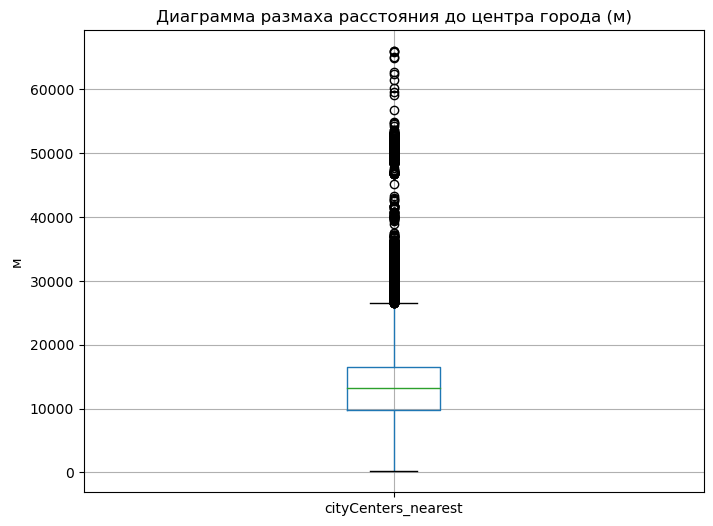

In [72]:
# Расстояние до центра города в метрах
df.boxplot(column='cityCenters_nearest', figsize=(8, 6))
plt.title('Диаграмма размаха расстояния до центра города (м)')
plt.ylabel('м')
plt.show()

Медиана около 14000 метров

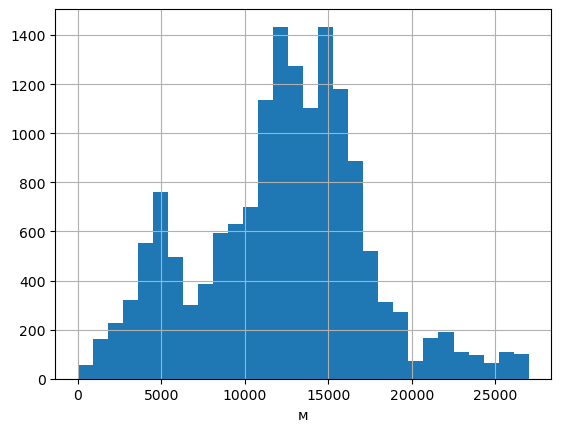

In [73]:
# Построим гистограмму расстояния до центра, отбросив "усы"
df['cityCenters_nearest'].hist(bins=30, range=(0, 27000))
plt.xlabel('м');

Больше всего объектов недвижимости находятся на удалении от центра города от 11000 до 16000 метров.

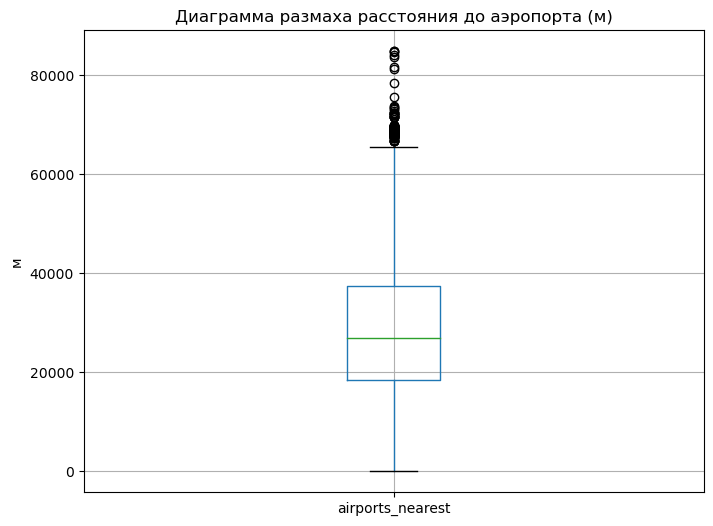

In [74]:
# Расстояние до ближайшего аэропорта
df.boxplot(column='airports_nearest', figsize=(8, 6))
plt.title('Диаграмма размаха расстояния до аэропорта (м)')
plt.ylabel('м')
plt.show()

Медианное значение находится на уровне суть ниже 30000 метров

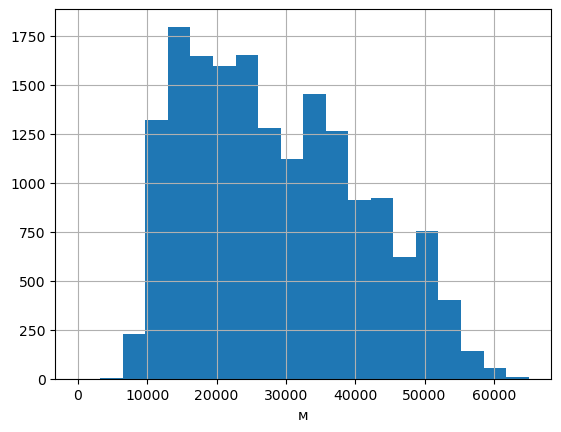

In [75]:
# Построим гистограмму расстояния до аэропорта, отбросив "усы"
df['airports_nearest'].hist(bins=20, range=(0, 65000))
plt.xlabel('м');

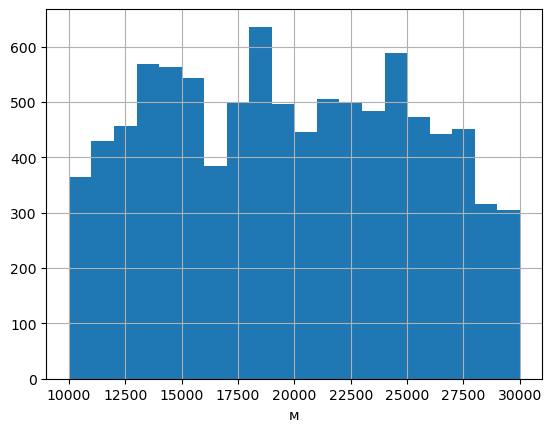

In [76]:
# Чтобы получить более точные данные выберем меньший промежуток (по наивысшим точкам гистограммы выше)
df['airports_nearest'].hist(bins=20, range=(10000, 30000))
plt.xlabel('м');

Чаще всего объект недвижимости находится на расстоянии 13000 - 25000 метров от аэропорта

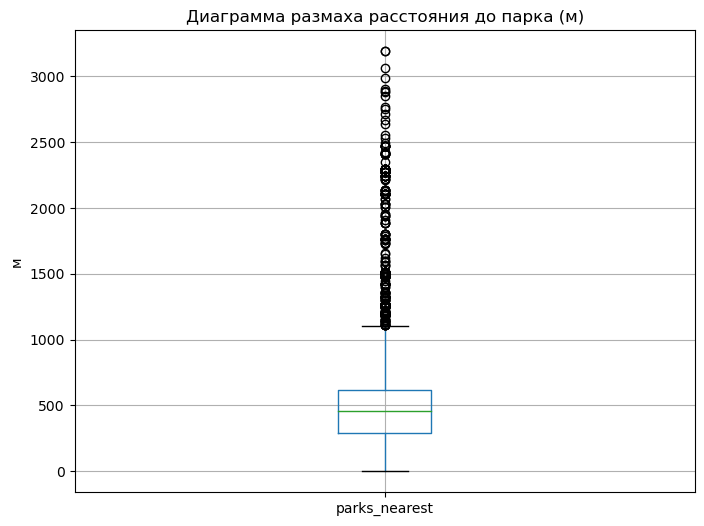

In [77]:
# Расстояние до ближайшего парка
df.boxplot(column='parks_nearest', figsize=(8, 6))
plt.title('Диаграмма размаха расстояния до парка (м)')
plt.ylabel('м')
plt.show()

Медиана находится чуть ниже 500 метров

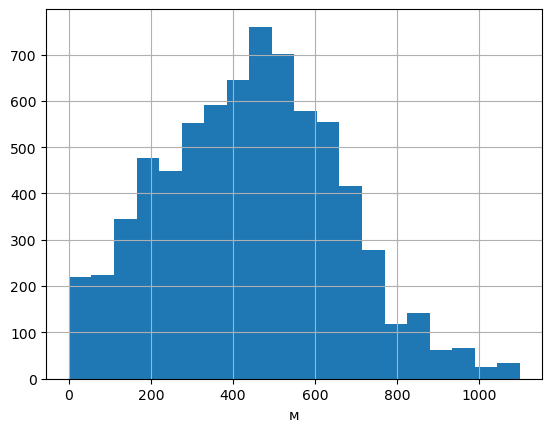

In [78]:
# Построим гистограмму расстояния до парка, отбросив "усы"
df['parks_nearest'].hist(bins=20, range=(0, 1100))
plt.xlabel('м');

Чаще всего парки находятся на удалении 300 - 600 метров

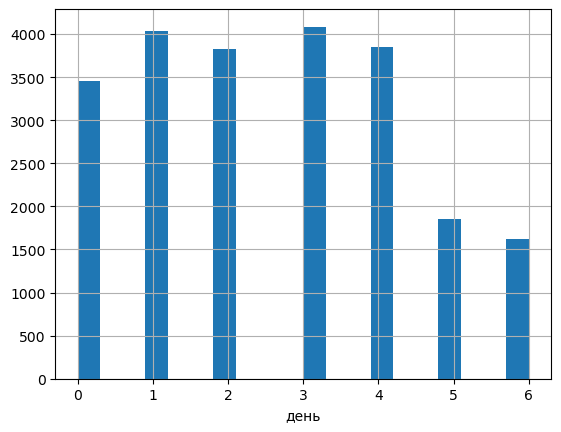

In [79]:
# День публикации объявления
df['weekday'].hist(bins=20)
plt.xlabel('день');

Из гистограммы видно, что в основном объявления публикуются по будням

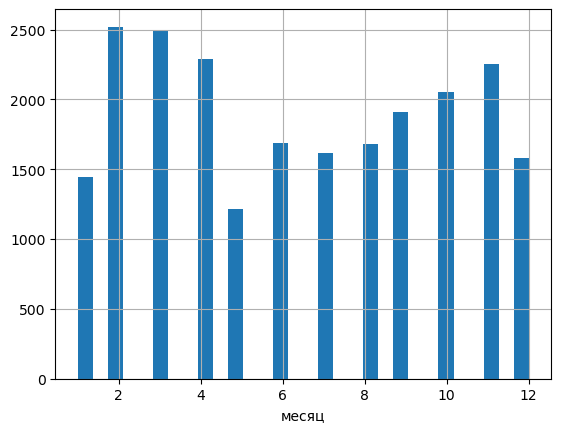

In [80]:
# Месяц публикации объявления
df['month'].hist(bins=30)
plt.xlabel('месяц');

Из гистограммы видно, что чаще всего объявления публикуются в феврале и марте, реже всего - в мае.

**ВЫВОД:** можно сказать, что типичный объект недвижимости это одно- или двухкомнатная квартира, общей площадью от 30 до 50 кв. м., жилой площадью 15-18 кв. м., высотой потолков 2,5 м, расположенная с 1 по 5 этаж, чаще всего в 5ти или 9ти этажных домах. Ценовой диапозон 3-6 млн.

**Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?**

In [81]:
# Посмотрим описание столбца
df['days_exposition'].describe()

count    19785.000000
mean       178.077028
std        217.042776
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

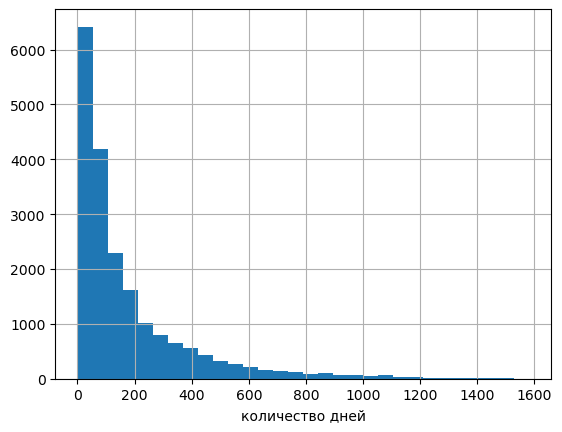

In [82]:
# Построим гистограмму
df['days_exposition'].hist(bins=30)
plt.xlabel('количество дней')
plt.show()

На гистограмме видно, что количество дней продажи после 600 мало, а после 1200 дней практически сливается с 0. 1200 дней это больше трех лет, в отдельных случаях такая долгая продажа недвижимости возможна, но в нашем случае их лучше отбросить.

In [83]:
# Отбросим значения больше 1200 дней
df.query('days_exposition < 1200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_kv_m,weekday,month,year,floor_type,city_center_km
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.6
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.9
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.1
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.6,6,True,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,True,...,NaN,1.0,806.0,519.0,129903.98,3,10,2016,другой,4.5
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5,17.5,4,True,...,NaN,NaN,NaN,413.0,45000.00,4,7,2017,другой,NaN
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,True,...,352.0,1.0,675.0,239.0,73717.95,4,8,2016,другой,34.1
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN


Чтобы выявить самые быстрые продажи ограничим график до 100 дней (исходя из гистограммы выше до 100 дней больше всего продаж)

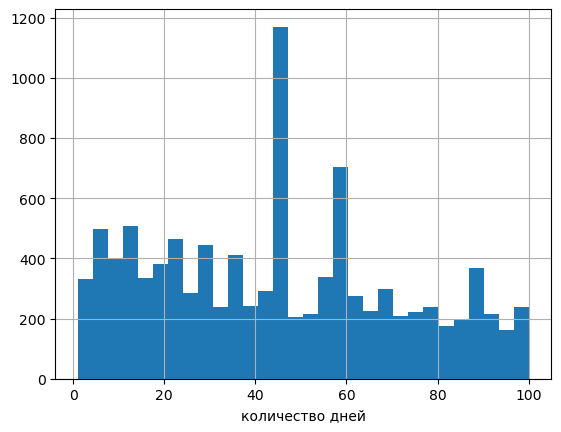

In [84]:
df['days_exposition'].hist(bins=30, range=(1, 100))
plt.xlabel('количество дней')
plt.show()

На гистограмме видны пики на 45 и 60 дней, это может быть связано с условиями размещения объявлений в Яндекс.Недвижимость. Продажи быстрее 45 дней можно считать быстрыми.

In [85]:
# Создадим новую переменную по срезу
days = df.query('45 < days_exposition < 1200')

In [86]:
# Посмотрим медиану
days['days_exposition'].median()

155.0

Медиана находится на уровне 155 дней.

In [87]:
# Посмотрим среднее значение
days['days_exposition'].mean()

235.57971014492753

Среднее значение 235 дней

**ВЫВОД:** в среднем недвижимость продается за 235 дней. Большинство продаж происходит в течение 100 дней после публикации. Быстрой можно считать продажу менее чем за 45 дней. Необычно долгая продажа более 1200 дней.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.**
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

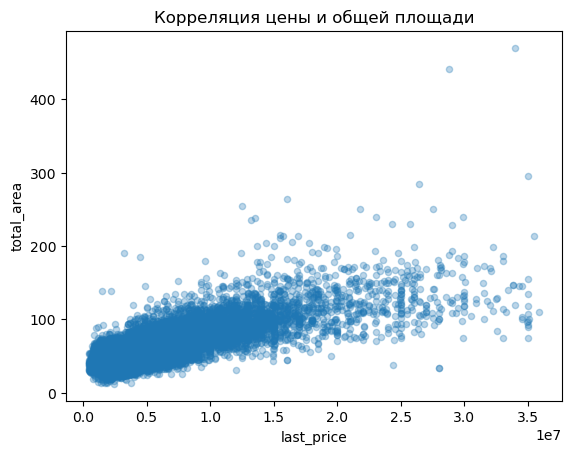

In [88]:
# Построим график корреляции цены и общей площади
df.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
plt.title('Корреляция цены и общей площади');

На графике прослеживается прямолинейная зависимость цены от общей площади объекта недвижимости. 

In [89]:
# Проверим это с помощью коэффициента корреляции Пирсона
df['last_price'].corr(df['total_area'])

0.77089155476078

Коэффициент корреляции положительный и близок к 1, следовательно чем больше общая площадь недвижимости, тем выше цена.

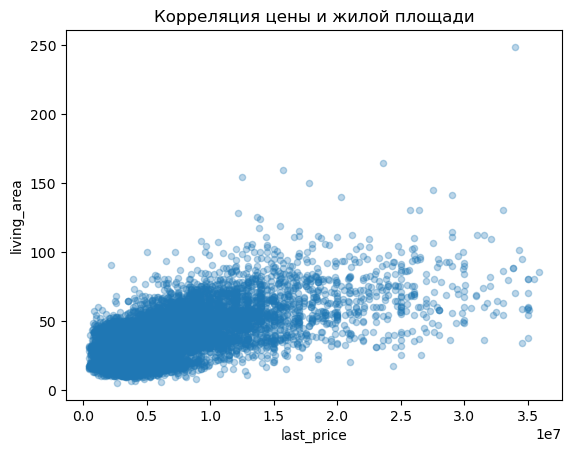

In [90]:
# Построим график корреляции цены и жилой площади
df.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3)
plt.title('Корреляция цены и жилой площади');

На графике также как в случае с общей площадью прослеживается зависимость цены от жилой площади объекта недвижимости. 

In [91]:
# Проверим это с помощью коэффициента корреляции Пирсона
df['last_price'].corr(df['living_area'])

0.6518577526820559

Коэффициент корреляции положительный и стремится к 1, следовательно чем больше жилая площадь недвижимости, тем выше цена.

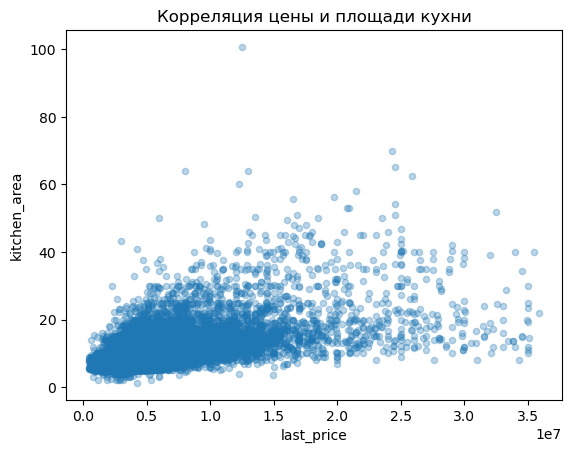

In [92]:
# Построим график корреляции цены и площади кухни
df.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3)
plt.title('Корреляция цены и площади кухни');

На графике прослеживается зависимость цены от площади кухни объекта недвижимости. Из графика видно, что зависимость не такая высокая, как в случае с общей площадью.

In [93]:
# Проверим это с помощью коэффициента корреляции Пирсона
df['last_price'].corr(df['kitchen_area'])

0.5896123466860723

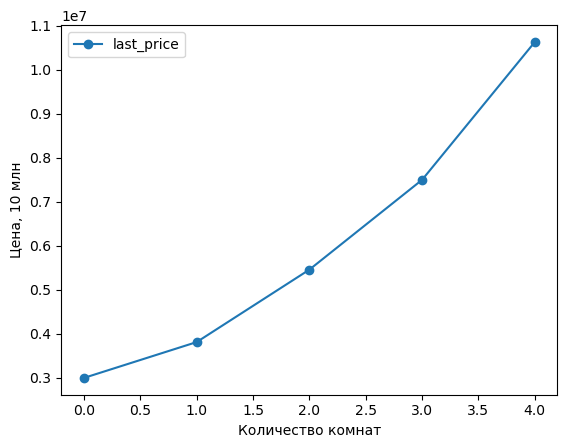

In [94]:
# Построим график зависимости средней цены от количества комнат с помощью сводной таблицы
df.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(style='o-')
plt.ylabel('Цена, 10 млн')
plt.xlabel('Количество комнат');

На графике прослеживается прямолинейная зависимость средней цены от количество комнат объекта недвижимости. Чем больше комнат, тем выше стоимость.

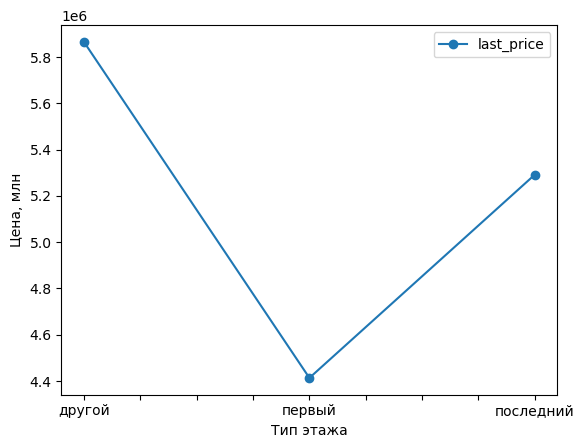

In [95]:
# Построим график зависимости средней цены от типа этажа с помощью сводной таблицы
df.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(style='o-')
plt.ylabel('Цена, млн')
plt.xlabel('Тип этажа');

Как видно из графика, самые дешевые квартиры расположены на первом этаже. Квартиры на последнем этаже в среднем стоят меньше, чем на других этажах (кроме первого).

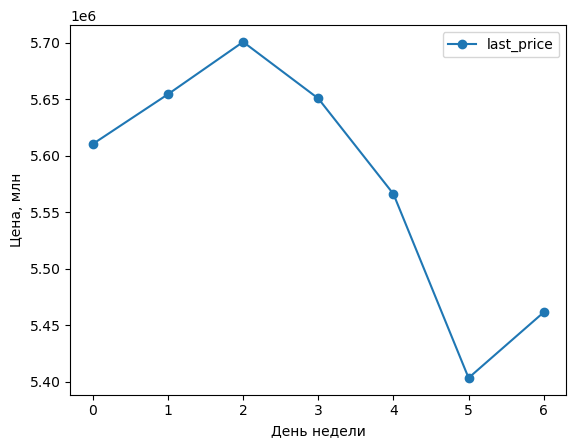

In [96]:
# Построим график зависимости средней цены от дня публикации объявления с помощью сводной таблицы
df.pivot_table(index='weekday', values='last_price', aggfunc='mean').plot(style='o-')
plt.ylabel('Цена, млн')
plt.xlabel('День недели');

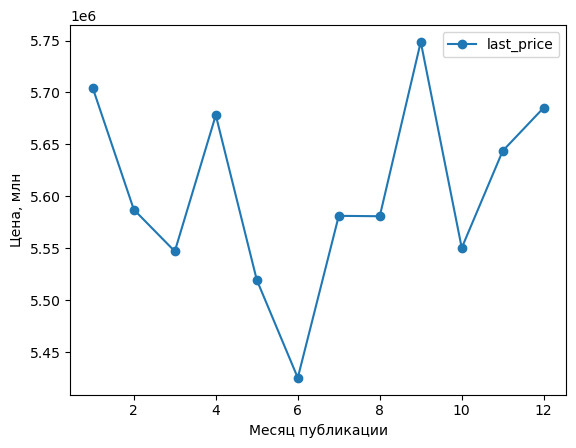

In [97]:
# Построим график зависимости средней цены от месяца публикации объявления с помощью сводной таблицы
df.pivot_table(index='month', values='last_price', aggfunc='mean').plot(style='o-')
plt.ylabel('Цена, млн')
plt.xlabel('Месяц публикации');

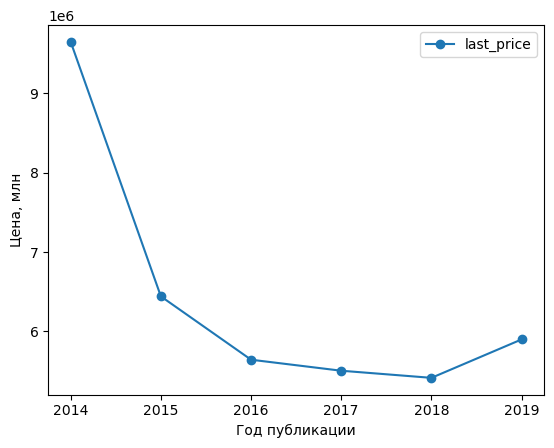

In [98]:
# Построим график зависимости средней цены от года публикации объявления с помощью сводной таблицы
df.pivot_table(index='year', values='last_price', aggfunc='mean').plot(style='o-')
plt.ylabel('Цена, млн')
plt.xlabel('Год публикации');

**Визуализируем матрицу корреляции с помощью тепловой карты**

In [99]:
# Импортируем нужную библиотеку
import seaborn as sns

In [100]:
# Создадим копию интересующих нас столбцов
new_df = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday', 'month', 'year']].copy()

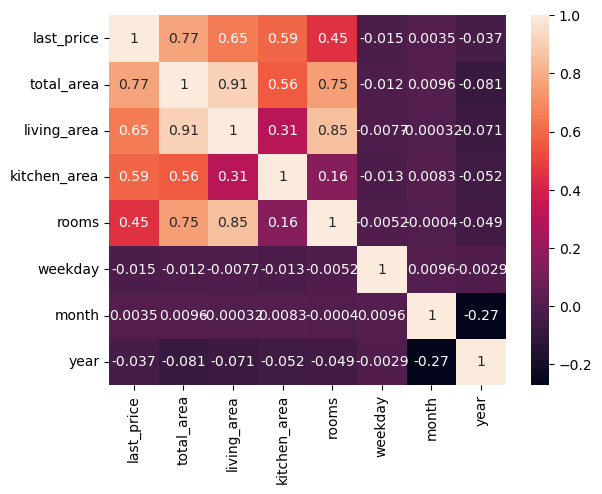

In [101]:
# Построим тепловую карту матрицы корреляции
sns.heatmap(new_df.corr(), annot=True);

**ВЫВОД:** больше всего на стоимость влияет общая площадь объекта недвижимости. Чем больше площадь, тем выше цена. Также на цену влияют жилая площадь, площадь кухни и количество комнат. Дата публикации (день, месяц, год) на цену практически не влияет.

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.**

In [102]:
# Выделим 10 населенных пунктов с наибольшим числом объявлений
# Используем значения в столбце price_kv_m т.к. в них нет пропусков
top10 = df.pivot_table(index='locality_name', values='price_kv_m', aggfunc='count').sort_values(by='price_kv_m', ascending=False).head(10)
top10

,price_kv_m
locality_name,
Санкт-Петербург,14886
поселок Мурино,545
поселок Шушары,434
Всеволожск,390
Пушкин,363
Колпино,328
поселок Парголово,326
Гатчина,300
деревня Кудрово,295


In [103]:
# Добавим новый столбец со средней ценой за квадратный метр
top10['price_kv_m_mean'] = df.pivot_table(index='locality_name', values='price_kv_m', aggfunc='mean')
top10.sort_values(by='price_kv_m_mean', ascending=False) # сортируем

,price_kv_m,price_kv_m_mean
locality_name,,
Санкт-Петербург,14886,111226.273405
Пушкин,363,103061.181846
деревня Кудрово,295,92748.921763
поселок Парголово,326,90332.262638
поселок Мурино,545,85746.521358
поселок Шушары,434,78865.550207
Колпино,328,75323.827195
Гатчина,300,68686.610933
Всеволожск,390,68661.546564


**ВЫВОД:** Самая высокая стоимость квадратного метра в Санк-Петербурге 111226,27 руб, минимальная стоимость квадратного метра недвижимости в Выборге 58208,72 руб.

**Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города**

In [104]:
# Выделим объявления в Санкт-Петербурге
df_spb = df.loc[df['locality_name'] == 'Санкт-Петербург']
df_spb.head(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_kv_m,weekday,month,year,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.9
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.1
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,True,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,11.6
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,13.9
15,16,4650000.0,39.0,2017-11-18,1,NaN,14,20.5,5,True,...,590.0,1.0,296.0,19.0,119230.77,5,11,2017,другой,14.3


In [105]:
# Добавим столбец с ценой за километр удаления от центра
df_spb['price_for_km'] = df_spb['last_price'] / df_spb['city_center_km']
df_spb.head(8)

C:\Users\jmilo\AppData\Local\Temp\ipykernel_36104\142409132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['price_for_km'] = df_spb['last_price'] / df_spb['city_center_km']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_kv_m,weekday,month,year,floor_type,city_center_km,price_for_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0,8.125000e+05
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.9,3.738129e+05
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.1,1.234568e+06
7,5,7915000.0,71.6,2019-04-18,2,NaN,24,NaN,22,True,...,0.0,NaN,NaN,110544.69,3,4,2019,другой,11.6,6.823276e+05
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0,3.600000e+05
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,2.0,553.0,137.0,127525.25,3,11,2017,другой,13.9,3.633094e+05
15,16,4650000.0,39.0,2017-11-18,1,NaN,14,20.5,5,True,...,1.0,296.0,19.0,119230.77,5,11,2017,другой,14.3,3.251748e+05
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,True,...,0.0,NaN,397.0,81707.32,3,11,2017,первый,10.7,6.261682e+05


In [106]:
# Рассчитаем среднюю цену километра от центра города
df_spb['price_for_km'].mean()

986295.6372048085

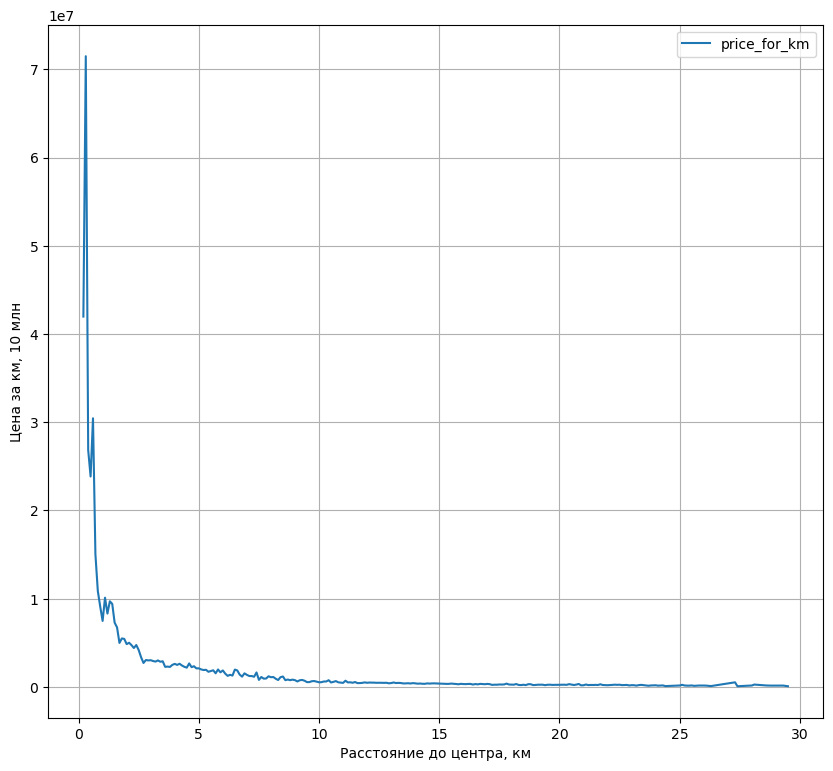

In [107]:
# Построим график распределения цены в зависимости от удаления от центра
df_spb.pivot_table(index='city_center_km', values='price_for_km', aggfunc='mean').plot(figsize=(10, 9), grid=True)
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена за км, 10 млн')
plt.show()

**ВЫВОД:** Средняя цена километра от центра города составляет 986295.63 руб. Как видно из графика, самая дорогая недвижимость находится на расстоянии примерно до 2 км от центра. На удалении от 2 до 10 километров от центра цена уменьшается. На расстоянии более 10 км от центра цены примерно одинаковые.

**ОБЩИЙ ВЫВОД**

В ходе проекта была выполнена предобработка данных: изменены типы данных в 5 столбцах, устранены явные и неявные дубликаты, заполнены пропущенные значения, устранены некорректные данные(исправлены опечатки в столбцах last_price, living_area и ceiling_height, устранены пики выше 99 процентиля). При этом удалось сохранить 96% исходных данных. Выделили категории этажей.

**Типичный объект недвижимости** это одно- или двухкомнатная квартира, общей площадью от 30 до 50 кв. м., жилой площадью 15-18 кв. м., высотой потолков 2,5 м, расположенная с 1 по 5 этаж, чаще всего в 5ти или 9ти этажных домах. Находится в ценовом диапозоне 3-6 млн. Меньше всего предложений квартир на первом и последнем этажах, это может быть связано с различными проблемами этих этажей (температура в помещении, неприятные запахи, шум, протекание крыши и тд).

В ходе исследования выявлена сильная зависимость между ценой недвижимости и ее общей площадью. Чем больше площадь недвижимости, тем выше ее цена. Дата публикации объявления практически не влияет на цену. В среднем недвижимость продается за 235 дней. Большинство продаж происходит в течение 100 дней после публикации. Быстрой можно считать продажу менее чем за 45 дней. Необычно долгая продажа более 1200 дней.

Проведен анализ цены (за 1 кв. м.) по 10 населенным пунктам с наибольшим числом объявлений. Ожидаемо, самая высокая стоимость квадратного метра жилья в Санкт-Петербурге (111226,27 руб), самая низкая в Выборге (58208,72 руб). При дальнейшем исследовании обнаружена логичная закономерность - чем дальше населенный пункт от Санкт-Петербурга, тем ниже стоимость квадратного метра жилья.

Самая дорогая недвижимость Санкт-Петербурга находится близко к центру (цена такой недвижимости может достигать нескольких десятков миллионов рублей). По мере удаления от центра города стоимость недвижимости уменьшается.